# Iterators & Generators Exercises

## Write code based on the following questions
---

**Qn 1)** Given the following `for` loop, write an iterator class called `MyEnumerate` for it. Spliting it into iterator and iterable object is not required.

```python
for index, letter in enumerate('abc'):
    print(f"{index}: {letter}")
```

In [135]:
class MyEnumerate:
    
    def __init__(self, string):
        self.string = string
        
    def __iter__(self):
        self.char = 0
        return self
    
    def __next__(self):
        if self.char < len(self.string):
            result = self.string[self.char]
            char = self.char
            self.char += 1
            return char, result
        else:
            raise StopIteration

In [136]:
for index, letter in MyEnumerate('abc'):
    print(f"{index} : {letter}")

0 : a
1 : b
2 : c


**Qn 2)** Write an iterator object and an iterable object produces the following output
```python
c = CircleIterable('abc', 5)
print(list(c))        # outputs: ['a', 'b', 'c', 'a', 'b']
```

In [137]:
# Separation of Iterable and Iterator!

# iterable object
class CircleIterable:
    def __init__(self, string, num):
        self.string = string
        self.num = num
    
    def __iter__(self):
        return CircleIterator(self.string, self.num)

# iterator 
class CircleIterator:
    def __init__(self, string, num):
        self.string = string
        self.num = num
        self.count = 1
        self.char = 0

    def __iter__(self):
        return self

    def __next__(self):
        
        if self.count <= self.num:
            if self.char >= len(self.string): # Remove this line then the iterator becomes an infinite iterator.
                self.char = 0
                
            result = self.string[self.char]
            self.char += 1
            self.count += 1
        
            return result
        else:
            raise StopIteration

In [138]:
c = CircleIterable('abc', 5)
print(list(c))        # outputs: ['a', 'b', 'c', 'a', 'b']

['a', 'b', 'c', 'a', 'b']


**Qn 3)** Write a generator `frange`, which behaves like `range` but accepts `float` values.

**Sample Program Output**
<pre>
0, 1, 2, 3, 4, 5, 
0.3, 1.3, 2.3, 3.3, 4.3, 5.3, 
0.3, 1.1, 1.9000000000000001, 2.7, 3.5, 4.3, 5.1, 
</pre>

In [139]:
def frange(stop, start = 0, step = 1):
    counter = start
    
    while counter <= stop:
        new_counter_val = yield counter
        if new_counter_val is None:
            counter += step
        else:
            counter = new_counter_val

In [140]:
for i in frange(5.6):
    print(i, end=", ")
print()
for i in frange(start=0.3, stop=5.6):
    print(i, end=", ")
print()
for i in frange(start=0.3, stop=5.6, step=0.8):
    print(i, end=", ")
print()

0, 1, 2, 3, 4, 5, 
0.3, 1.3, 2.3, 3.3, 4.3, 5.3, 
0.3, 1.1, 1.9000000000000001, 2.7, 3.5, 4.3, 5.1, 


**Qn 4)** Write a generator `trange`, which generates a sequence of time tuples from start to stop incremented by step. A time tuple is a 3-tuple of integers: (hours, minutes, seconds) therefore a call to `trange` might look like this: `trange((10, 10, 10), (13, 50, 15), (0, 15, 12) )`

**Sample Program Output**
<pre>
(10, 10, 10)
(11, 34, 22)
(12, 58, 34)
(14, 22, 46)
(15, 46, 58)
(17, 11, 10)
(18, 35, 22)
</pre>

In [154]:
def trange(start, end, step):
    hours, minutes, seconds = start
    current_seconds = hours*60*60 + minutes*60 + seconds
    
    ehours, eminutes, eseconds = end
    end_seconds = ehours*60*60 + eminutes*60 + eseconds
    
    shours, seminutes, sseconds = step
    step_seconds = shours*60*60 + seminutes*60 + sseconds
    
    while  current_seconds < end_seconds:
        yield current_seconds//3600, current_seconds//60%60, current_seconds%60
        current_seconds += step_seconds

In [155]:
for time in trange((10, 10, 10), (19, 53, 15), (1, 24, 12) ):
    print(time)  

(10, 10, 10)
(11, 34, 22)
(12, 58, 34)
(14, 22, 46)
(15, 46, 58)
(17, 11, 10)
(18, 35, 22)


**Qn 5)** Write a generator with the name `running_average` which computes the running average.

**Sample Program Output**
<pre>
sent:   7, new average:   7.00
sent:  13, new average:  10.00
sent:  17, new average:  12.33
sent: 231, new average:  67.00
sent:  12, new average:  56.00
sent:   8, new average:  48.00
sent:   3, new average:  41.57
</pre>

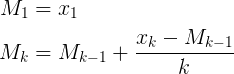

In [143]:
def running_average():
    
    count = 1
    prev_sum = 0
    new_average = 0
    new_num = 0
    
    while True:
        new_num = yield new_average
        new_average = new_average + (new_num-new_average)/count
        count += 1      

In [144]:
ra = running_average()  # initialize the generator
next(ra)                # start the generator

for value in [7, 13, 17, 231, 12, 8, 3]:
    print(f'sent: {value:3d}, new average: {ra.send(value):6.2f}')

sent:   7, new average:   7.00
sent:  13, new average:  10.00
sent:  17, new average:  12.33
sent: 231, new average:  67.00
sent:  12, new average:  56.00
sent:   8, new average:  48.00
sent:   3, new average:  41.57


**Qn 6)** Write a generator with the name `random_ones_and_zeroes`, which returns a bitstream, i.e. a zero or a one in every iteration. The probability `p` for returning a `1` is defined in a variable `p`. The generator will initialize this value to `0.5`. In other words, zeroes and ones will be returned with the same probability.

**Sample Program Output**
<pre>
We change the probability to : 0.2
1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 

We change the probability to : 0.8
1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 
</pre>

In [145]:
def random_ones_and_zeros():
    import random
    
    p=0.5
    digit = random.choices([1,0], weights = [p,1-p])[0]
    
    while True:
        new_p = yield digit
        if new_p is not None:
            p = new_p
            digit = random.choices([1,0], weights = [p,1-p])[0]
        else:
            digit = random.choices([1,0], weights = [p,1-p])[0]

In [146]:
x = random_ones_and_zeros()
next(x)  # we are starting up the generator therefore the first value can be discarded

for p in [0.2, 0.8]:
    print("\nWe change the probability to : " + str(p))
    x.send(p)
    for i in range(20):
        print(next(x), end=" ")
    print()


We change the probability to : 0.2
0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 

We change the probability to : 0.8
1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 1 


In [147]:
def double_inputs():
     while True:
        x = yield
        print("x", x)
        yield x * 2
        
a = double_inputs()        

next(a)
a.send(3)

x 3


6